# Plot boundaries


## Setup

Import the following packages:

In [1]:
import numpy as np
import pandas as pd

import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Look for data in these places:

In [2]:
paths = dict(
    dir_data_input = '../data_example/',
    dir_data_geojson = '../data_geojson/ons_data/',
    dir_data_tabular = '../data_tabular/',
    values_file = 'example_lsoa_englandwales.csv',
    lsoa_geojson = 'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    lsoa_regions = 'LSOA_regions.csv',
    stroke_hospitals = 'stroke_hospitals_2022.csv'
)

Read in this file of region information for each LSOA. It includes the following data:

| Column name | Description | Usage |
| --- | --- | --- | 
| LSOA11 CD / NM | LSOA 2011 codes / names | England & Wales |
| long / lat | Longitude and latitude of the centroid of the LSOA | England & Wales |
| CCG19 CD / NM | Clinical Commissioning Groups 2019 codes / names | England |
| ICB22 CD / NM | Integrated Care Board 2022 codes / names. Replacement for CCGs. | England |
| STP19 CD / NM | Sustainability and Transformation Partnerships codes / names (~similar to counties) | England |
| LHB20 CD / NM / NMW | Local Health Boards 2020 codes / names / Welsh names | Wales |
| RGN11 CD / NM | Region codes / names. Gives specific regions within England, but Wales and Scotland just get the country name. | England & Wales |
| LAD17 CD / NM | Local Authority District 2017 codes / names | England & Wales |
| SCN17 CD/NM | Strategic Clinical Network 2017 codes / names | England |

In [3]:
region_file = f"{paths['dir_data_tabular']}{paths['lsoa_regions']}"
lsoa_regions = pd.read_csv(region_file)

/tmp/ipykernel_12194/1568924246.py:2: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  lsoa_regions = pd.read_csv(region_file)


In [4]:
lsoa_regions.columns

Index(['LSOA11CD', 'LSOA11NM', 'LSOA11NMW', 'LSOA11BNG_E', 'LSOA11BNG_N',
       'LSOA11LONG', 'LSOA11LAT', 'MSOA11CD', 'MSOA11NM', 'CCG19CD', 'CCG19NM',
       'ICB22CD', 'ICB22NM', 'LAD17CD', 'LAD17NM', 'STP19CD', 'STP19NM',
       'LHB20CD', 'LHB20NM', 'LHB20NMW', 'SCN17CD', 'SCN17NM', 'RGN11CD',
       'RGN11NM', 'CTRY11NM'],
      dtype='object')

In [5]:
lsoa_regions.index

RangeIndex(start=0, stop=181408, step=1)

In [6]:
boundary_files = {
    'LSOA11NM':'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
    'CCG19NM':'Clinical_Commissioning_Groups_April_2019_Boundaries_EN_BGC_2022_-7963862461000886750.geojson',
    'ICB22NM':'ICB_JUL_2022_EN_BGC_V3_7901616774526941461.geojson',
    'LAD17NM':'LAD_Dec_2017_GCB_GB_2022_5230662237199919616.geojson',
    'STP19NM':'STP_Apr_2019_GCB_in_England_2022_3138810296697318496.geojson',
    'LHB20NM':'Local_Health_Boards_April_2020_WA_BGC_2022_94310626700012506.geojson',
    'SCN17NM':'SCN_Dec_2016_GCB_in_England_2022_8470122845735728627.geojson',
    'RGN11NM':'Regions_December_2022_EN_BGC_4589208765943883498.geojson',
}

In [7]:
boundary_colour_dict = {
    'LSOA11NM':'LightGrey',
    'CCG19NM':'y',
    'ICB22NM':'m',
    'LAD17NM':'g',
    'STP19NM':'r',
    'LHB20NM':'b',
    'SCN17NM':'b',
    'RGN11NM':'k',
}

# Draw a boundary file

In [8]:
boundary_file = boundary_files['CCG19NM']

geojson_file =f"{paths['dir_data_geojson']}{boundary_file}"
df_geojson = geopandas.read_file(geojson_file)#, crs='EPSG:27700')

In [9]:
df_geojson

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",393990,462191,-2.093300,54.0556,0025eb18-d86b-4a5f-9aa1-40ddd4dfcbdd,"POLYGON ((399803.689 475231.193, 400155.625 47..."
1,2,E38000002,NHS Ashford CCG,597640,140644,0.823374,51.1310,4d20f779-50a4-4741-b77f-b0fe806bcc7d,"POLYGON ((610050.499 146602.203, 609973.500 14..."
2,3,E38000004,NHS Barking and Dagenham CCG,547758,185109,0.129493,51.5455,9785f4bd-ad46-4633-8c4e-8144688f807f,"MULTIPOLYGON (((543881.063 183185.609, 543837...."
3,4,E38000005,NHS Barnet CCG,523471,191753,-0.218220,51.6111,33c19357-966f-4f89-86de-359ab645b3f0,"POLYGON ((525814.122 198211.514, 525568.563 19..."
4,5,E38000006,NHS Barnsley CCG,429979,403330,-1.549250,53.5258,3ca87b20-21e0-4acb-b373-1f4df14aa460,"POLYGON ((443219.660 409833.090, 443286.853 40..."
...,...,...,...,...,...,...,...,...,...
186,187,E38000226,NHS Fylde and Wyre CCG,345943,440271,-2.823300,53.8559,2afea037-5406-452f-9f2c-88d5e31633bd,"MULTIPOLYGON (((341719.765 450567.916, 341715...."
187,188,E38000227,NHS Greater Preston CCG,358317,435004,-2.634480,53.8097,21583264-65b8-409b-aa4a-7f9d2e4ce100,"MULTIPOLYGON (((347728.756 429688.754, 347726...."
188,189,E38000228,NHS Morecambe Bay CCG,362268,479660,-2.580040,54.2113,5b0b624c-dca1-4f52-9a7a-f78bf276c54f,"MULTIPOLYGON (((319773.799 485609.095, 319745...."
189,190,E38000229,NHS Derby and Derbyshire CCG,426752,353558,-1.602100,53.0786,1ec3276c-a5db-4ecd-a2ba-7f4f98299b8b,"POLYGON ((445071.250 381534.375, 445074.597 38..."


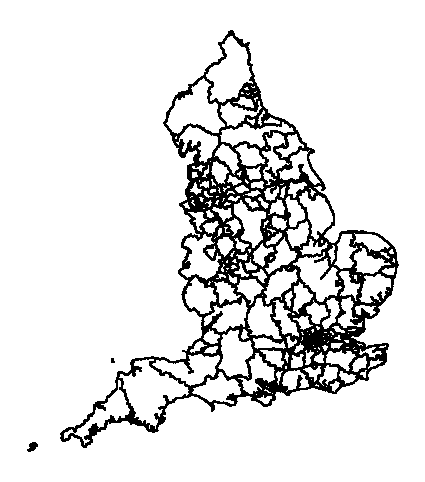

In [10]:
fig, ax = plt.subplots(figsize=(6, 6)) # Make max dimensions XxY inch

# Draw the main map with colours (choropleth):
df_geojson.plot(
    ax=ax,              # Set which axes to use for plot (only one here)
    # column='OBJECTID',     # Column to apply colour
    antialiased=False,  # Avoids artifact boundry lines
    # edgecolor='face',   # Make LSOA boundry same colour as area
    facecolor='None',
    edgecolor='k',   # Make LSOA boundry same colour as area
    # vmin=-range,        # Manual scale min (remove to make automatic)
    # vmax=range,         # Manual scale max (remove to make automatic)
    # cmap='viridis',     # Colour map to use
    legend_kwds={
        'shrink':0.5,   # Adjust size of colourmap key
        'label':'Dummy data'  # Add label
    },
    legend=True         # Set to display legend
    )

ax.set_axis_off()  # Turn off axis line and numbers
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()

## Draw a subset of the boundaries

Match the contents of the geojson with the contents of the lsoa_regions DataFrame.

In [11]:
lsoa_regions.columns

Index(['LSOA11CD', 'LSOA11NM', 'LSOA11NMW', 'LSOA11BNG_E', 'LSOA11BNG_N',
       'LSOA11LONG', 'LSOA11LAT', 'MSOA11CD', 'MSOA11NM', 'CCG19CD', 'CCG19NM',
       'ICB22CD', 'ICB22NM', 'LAD17CD', 'LAD17NM', 'STP19CD', 'STP19NM',
       'LHB20CD', 'LHB20NM', 'LHB20NMW', 'SCN17CD', 'SCN17NM', 'RGN11CD',
       'RGN11NM', 'CTRY11NM'],
      dtype='object')

In [12]:
lsoa_regions['RGN11NM'].unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London', 'Wales'], dtype=object)

In [13]:
df_to_draw = lsoa_regions[lsoa_regions['RGN11NM'] == 'South West']

len(df_to_draw)

17644

In [14]:
df_geojson_to_draw = df_geojson[
    df_geojson['CCG19NM'].isin(df_to_draw['CCG19NM'].values)]

len(df_geojson_to_draw)

9

In [15]:
df_geojson_to_draw

,OBJECTID,CCG19CD,CCG19NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
7,8,E38000009,NHS Bath and North East Somerset CCG,366218,161999,-2.48653,51.3560,2bfa9ad4-5e69-4e81-90ee-48838588ccfb,"POLYGON ((379613.903 170018.906, 379561.759 16..."
35,36,E38000045,NHS Dorset CCG,375748,99796,-2.34547,50.7972,ca89a074-0647-4703-ad1d-8d1f132cfdb7,"MULTIPOLYGON (((416350.204 92412.896, 416250.4..."
49,50,E38000062,NHS Gloucestershire CCG,389595,213465,-2.15235,51.8197,7c182875-92ea-4509-9b2b-04d08f8acfdc,"POLYGON ((423049.194 232166.407, 423126.999 23..."
73,74,E38000089,NHS Kernow CCG,212501,64494,-4.64249,50.4502,6c560816-0546-41eb-ace1-9dbd314a9af6,"MULTIPOLYGON (((211740.701 93341.801, 211725.5..."
119,120,E38000150,NHS Somerset CCG,309310,131072,-3.29581,51.0718,9eee1485-94fc-49e8-8381-6fabf8fa3be3,"MULTIPOLYGON (((329191.704 148543.199, 329104...."
144,145,E38000181,NHS Swindon CCG,419127,186641,-1.72536,51.5783,9a71c056-f3f9-4888-a110-424f2d2b544d,"POLYGON ((422030.096 199080.267, 422033.500 19..."
169,170,E38000206,NHS Wiltshire CCG,405209,158863,-1.92661,51.3288,052c6874-e184-40f6-8c78-257b4073df46,"POLYGON ((414715.306 196490.194, 414546.595 19..."
182,183,E38000222,"NHS Bristol, North Somerset and South Gloucest...",366745,176368,-2.48031,51.4853,e73cf4b2-c2aa-4a61-ac26-23948dee74bf,"MULTIPOLYGON (((322658.500 160489.200, 322563...."
190,191,E38000230,NHS Devon CCG,283156,93082,-3.65679,50.7256,55f7b650-3737-49e6-9042-011a126bafee,"MULTIPOLYGON (((213325.945 143307.255, 213276...."


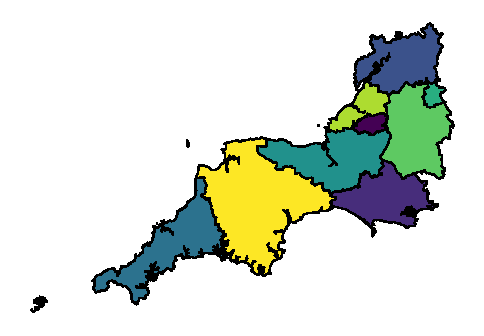

In [16]:
fig, ax = plt.subplots(figsize=(6, 6)) # Make max dimensions XxY inch

# Draw the main map with colours (choropleth):
df_geojson_to_draw.plot(
    ax=ax,              # Set which axes to use for plot (only one here)
    # column='OBJECTID',     # Column to apply colour
    antialiased=False,  # Avoids artifact boundry lines
    # edgecolor='face',   # Make LSOA boundry same colour as area
    # facecolor='None',
    edgecolor='k',   # Make LSOA boundry same colour as area
    # vmin=-range,        # Manual scale min (remove to make automatic)
    # vmax=range,         # Manual scale max (remove to make automatic)
    cmap='viridis',     # Colour map to use
    legend_kwds={
        'shrink':0.5,   # Adjust size of colourmap key
        'label':'Dummy data'  # Add label
    },
    legend=True         # Set to display legend
    )

ax.set_axis_off()  # Turn off axis line and numbers
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()

## Draw multiple boundaries together

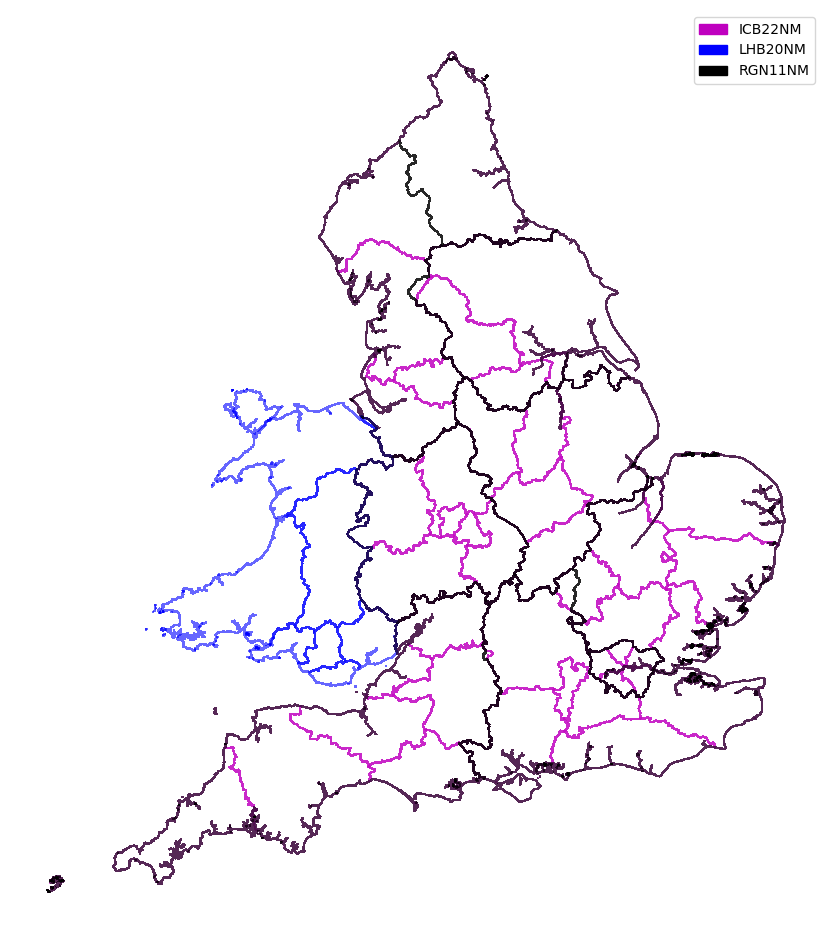

In [17]:
fig, ax = plt.subplots(figsize=(12, 12)) # Make max dimensions XxY inch

boundaries_here = ['ICB22NM', 'LHB20NM', 'RGN11NM']

dummy_legend_patches = []

for b, boundary_type in enumerate(boundaries_here):
    boundary_file = boundary_files[boundary_type]
    geojson_file =f"{paths['dir_data_geojson']}{boundary_file}"
    df_geojson = geopandas.read_file(geojson_file)#, crs='EPSG:27700')
    
    boundary_colour = boundary_colour_dict[boundary_type]
    
    # Draw the main map with colours (choropleth):
    df_geojson.plot(
        ax=ax,              # Set which axes to use for plot (only one here)
        # column='OBJECTID',     # Column to apply colour
        antialiased=False,  # Avoids artifact boundry lines
        # edgecolor='face',   # Make LSOA boundry same colour as area
        facecolor='none',
        alpha=0.6,
        edgecolor=boundary_colour,
        # vmin=-range,        # Manual scale min (remove to make automatic)
        # vmax=range,         # Manual scale max (remove to make automatic)
        # cmap='viridis',     # Colour map to use
        legend_kwds={
            'shrink':0.5,   # Adjust size of colourmap key
            'label':'Dummy data'  # Add label
        },
        legend=True,         # Set to display legend
        label=boundary_type
        )
    dummy_legend_patches.append(
        mpatches.Patch(color=boundary_colour, label=boundary_type))

ax.set_axis_off()  # Turn off axis line and numbers

ax.legend(handles=dummy_legend_patches)
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()

## Colour boundary set A by boundary set B

This works but in this case it gives weird and unwanted results.

In the north, a tiny part of the ICB containing Lancashire covers LSOAs that are linked to Yorkshire. This means that the whole ICB is coloured to match Yorkshire and the Humber instead of the expected North West. The colour is chosen from the new column `RGN11NM` made in the `pd.merge()` statement below. Presumably when the merge happens, only the row latest in the DataFrame is kept. The colour that is chosen is arbitrary - it is to do with the order of data in the input DataFrame rather than anything useful about the regions themselves.

This colouring method could be useful for a region set A that exactly matches the boundaries of region set B, e.g. Set B is counties and Set A is districts within the county.

/home/anna/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/anna/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


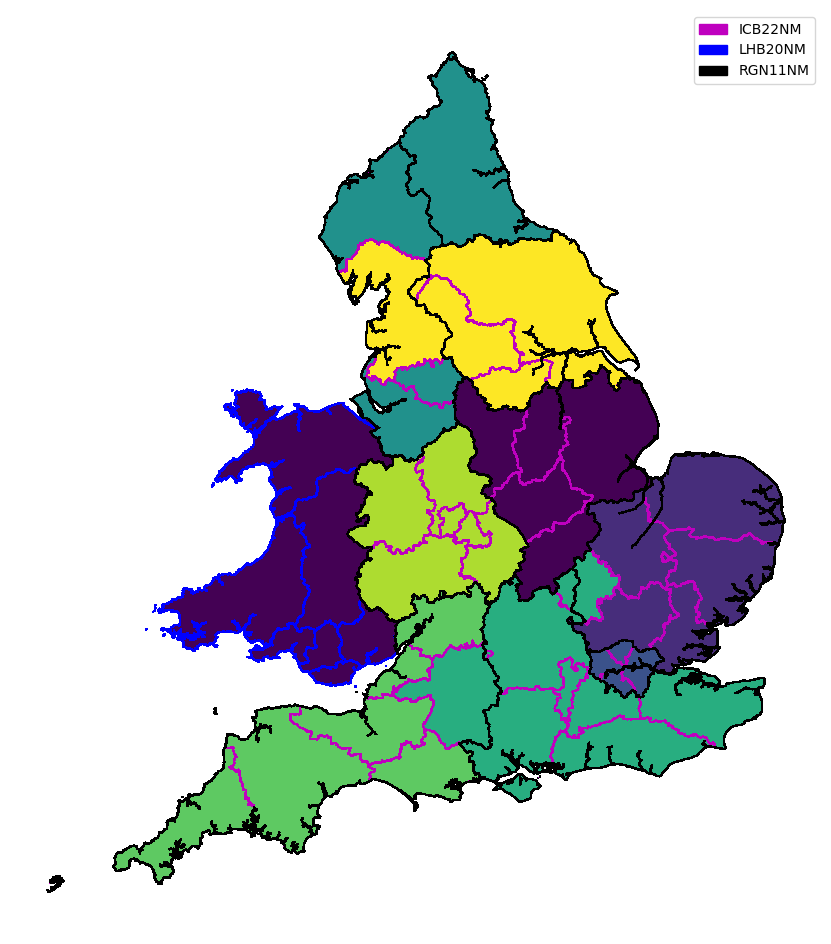

In [18]:
fig, ax = plt.subplots(figsize=(12, 12)) # Make max dimensions XxY inch

boundaries_here = ['ICB22NM', 'LHB20NM', 'RGN11NM']

dummy_legend_patches = []

for b, boundary_type in enumerate(boundaries_here):
    boundary_file = boundary_files[boundary_type]
    geojson_file =f"{paths['dir_data_geojson']}{boundary_file}"
    df_geojson = geopandas.read_file(geojson_file)#, crs='EPSG:27700')

    boundary_colour = boundary_colour_dict[boundary_type]

    if boundary_type != 'RGN11NM':
        # Colour differently depending on which region it's in.
        lsoa_regions_shortlist = lsoa_regions[['RGN11NM', boundary_type]].drop_duplicates()
        df_geojson = pd.merge(
            df_geojson, lsoa_regions_shortlist,
            left_on=boundary_type, right_on=boundary_type, how='left'
        )
        kwargs = dict(column='RGN11NM', cmap='viridis', edgecolor=boundary_colour)
    else:
        kwargs = dict(edgecolor=boundary_colour, facecolor='none')
    
    
    # Draw the main map with colours (choropleth):
    df_geojson.plot(
        ax=ax,              # Set which axes to use for plot (only one here)
        antialiased=False,  # Avoids artifact boundry lines
        # vmin=-range,        # Manual scale min (remove to make automatic)
        # vmax=range,         # Manual scale max (remove to make automatic)
        legend_kwds={
            'shrink':0.5,   # Adjust size of colourmap key
            'label':'Dummy data'  # Add label
        },
        # legend=True,         # Set to display legend
        label=boundary_type,
        **kwargs
        )
    dummy_legend_patches.append(
        mpatches.Patch(color=boundary_colour, label=boundary_type))

ax.set_axis_off()  # Turn off axis line and numbers

ax.legend(handles=dummy_legend_patches)
# plt.savefig('example_map_geopandas.jpg', dpi=300, bbox_inches='tight')  # Save figure
plt.show()